# Predicting Daily Bike Rentals

### In this project will build a neural network to predict daily bike rental ridership. 

## 1. Importing needed packages

In [1]:
# Data Wrangling 
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

import sys


# Display inline matplotlib plots 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2. Reading the data in

In [2]:
# reading in the dataset
data = pd.read_csv('hour.csv')
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Attribute Information

 - instant: record index
 - dteday : date of the day
 - season : (1:spring, 2:summer, 3:fall, 4:winter)
 - yr     : year (0:2011, 1:2012)
 - mnth   : month (1 to 12)
 - hr     : hour ( 0 to 23)
 - holiday: whether the day is holiday or not (0 or 1)
 - weekday: day of the week 
 - workingday: (0: holiday or weekend, otherwise 1)
 - weathersit: (1:clear, 2:mist, 3:Light snow/rain, 4:Heavy rain)
 - temp   : Normalized temperature in Celsius
 - atemp  : Normalized feeling temperature in Celsius
 - hum    : Normalized humidity (Values are divided to 100)
 - windspeed : Normalized wind speed (Values are divided to 67)
 - casual : Count of casual users
 - registered: Count of regeistered users
 - cnt    : Count of total rental bikes including both casual and registered

In [3]:
# concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## 3. Checking out the data

The dataset provided shows information about the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the cnt column. 

Let's start by plotting the number of bike riders over the first week. 

<AxesSubplot:xlabel='dteday'>

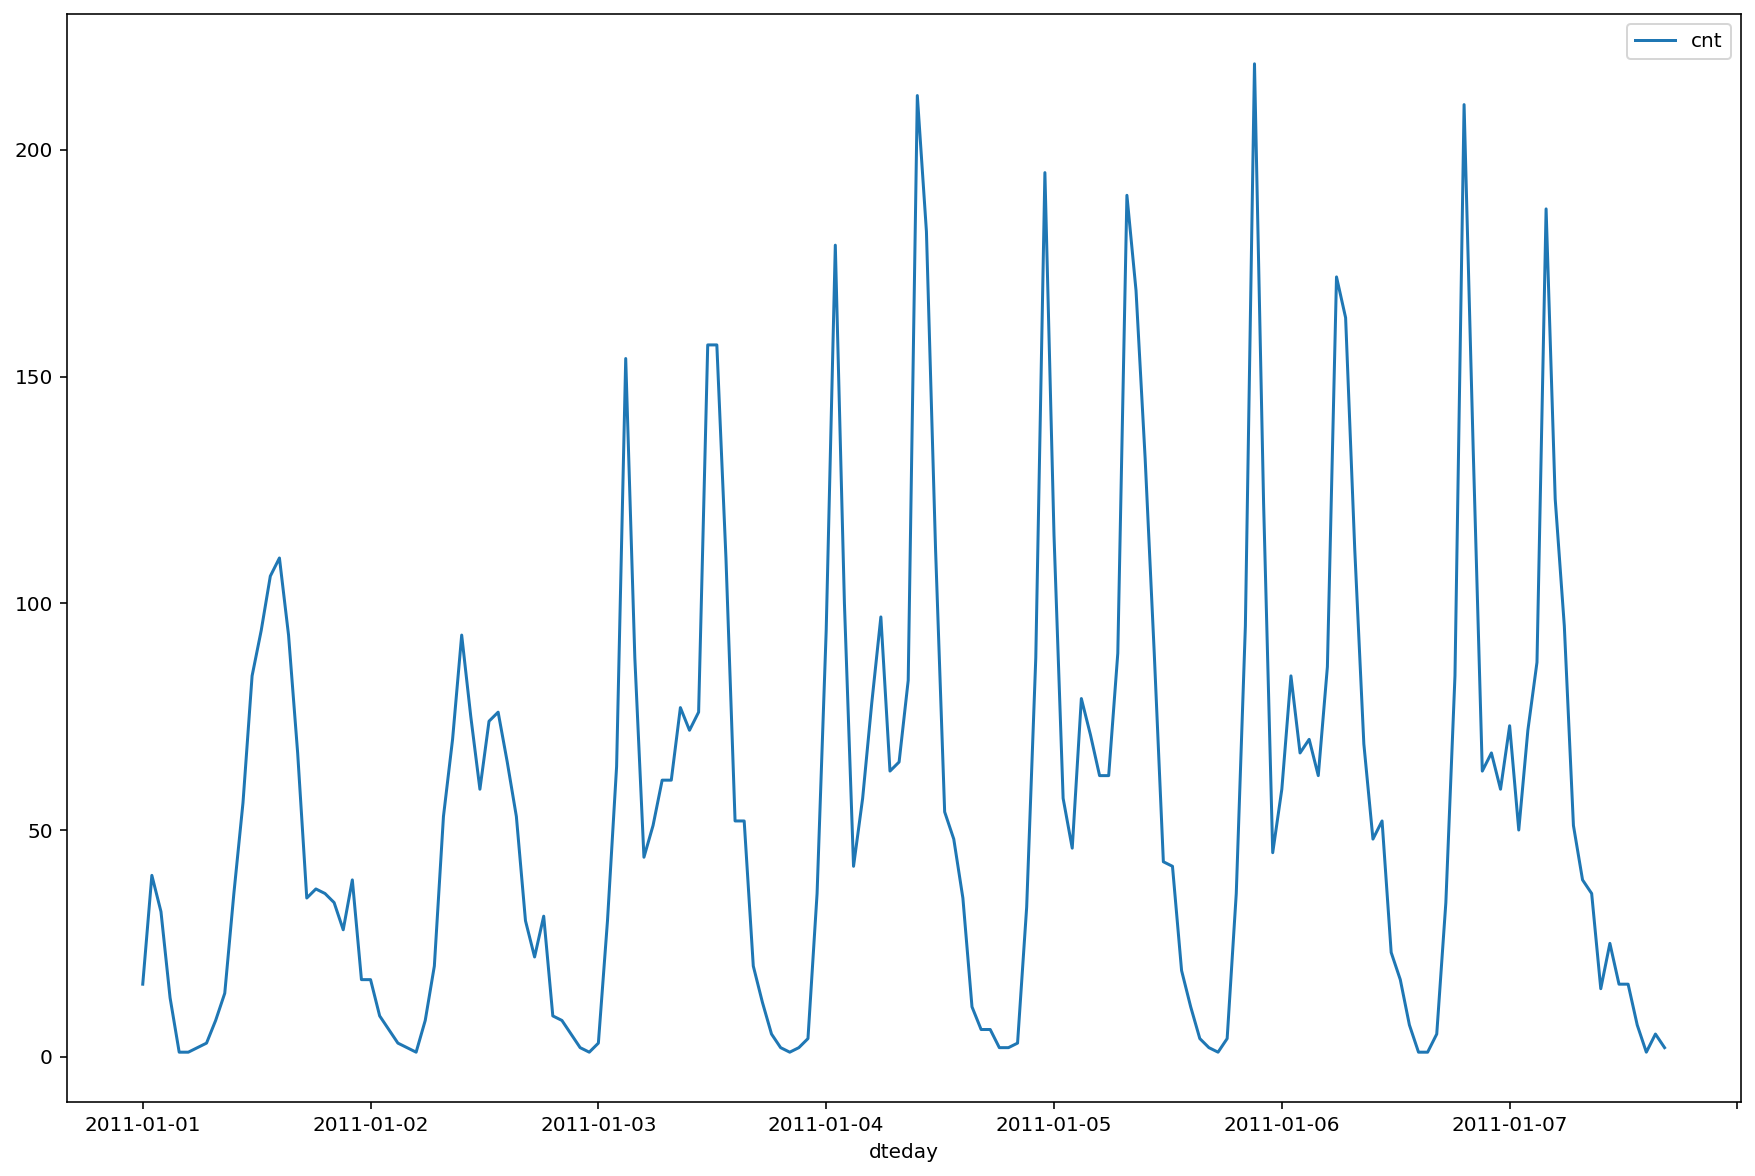

In [4]:
# bike riders over the fisrt week
data[:24*7].plot(x = 'dteday', y = 'cnt', figsize = (15,10))

In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Above we can see the hourly rentals. The weekends have lower over all ridership and there are spikes when people are biking to and from  work during the week. There are also a number of various factors that affect the number of riders such as: temperature, humidity and windspeed. 

### Dummy variables

To use the categorical variables in our model we must transform them to dummy variables. This is done by using 'get_dummies' method. 

In [6]:
# changing categorical variables to dummy variables
cat_variables = ['season','mnth','hr','weekday', 'weathersit']
for i in cat_variables:
    dummies = pd.get_dummies(data[i], prefix = i)
    data = pd.concat([data,dummies], axis = 1)
# dropping unnecessary columns
columns_to_drop = ['instant', 'season','mnth','hr','dteday','weathersit','weekday','atemp','workingday']
df=data.drop(columns_to_drop, axis = 1)
df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,1,1,0,0,0


### Scaling target variables

To make training the network easier, we'll standardize each of the continous variables. By doing this, will shift and scale the variables such as that they have zero mean and a standard deviation of 1. Z score is one of the most popular standardization methods for that will use it in this project. Mathematically, scaled variable would be calculated by subtracting mean of the original variable from the initial value and then it divide it by the standard deviation of the original variable.

In [7]:
# continous variables
cont_variables = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# store scalings in a dictionary so we can convert back later
scaled_features = {}
for i in cont_variables:
    mean, std = df[i].mean(), df[i].std()
    scaled_features[i] = [mean, std]
    df.loc[:,i] = (df[i]-mean)/std

In [8]:
df.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,1,1,0,0,0


### Splitting the data into training, testing and validation sets

In this project, will save the last 21 days of the data to use as a test data after training the network. We'll use this set to make predictions and compare them with the actual number of riders. 

In [9]:
# saving the last 21 days for test data
test_data = df[-21*24 :]
df = df[:-21*24]

# separating the data into features and targets
target_variables = ['cnt', 'casual', 'registered']
features, targets = df.drop(target_variables, axis=1), df[target_variables]
# splitting the data into test features and targets
test_features, test_targets = test_data.drop(target_variables, axis =1), test_data[target_variables]

Now will split the data into training and validating sets as the networkis being trained. Since this is time series data, we'll train on historical data, then predict on validation set. 

In [10]:
# saving the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
validation_features, validation_targets = features[-60*24:], targets[-60*24:]

## 4. Building the network

Now that we have our training, testing and validating sets its time to build our network. We'll build a structure that consists of backward and forward propagations. We'll also set hyperparameters: learning rate, the number of hidden units, and the number of training passes. 

The network has two layers, a hidden layer and an output layer. The hidden layer will use sigmoid function for activations. The output layer will only have one node and is used for regression. The output of the node is the same as the input of the node. That is, the activation function is f(x) = x. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. By working through each layer in the network, can calculate the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called forward propagation. Weights are used to propogate signals forward from the input to the output layers in a neural network. Weights can also be used to propagate error backwards from the output back into the network to update the weights. This phenomena is called back propagation. 

To build the network, we'll apply the following tasks: 
 - Implement the sigmoid function to use the activation function. 
 - Implement the forward pass. 
 - Implement the backpropagation algorithm. 
 - Calculate the output error. 

In [11]:
class NeuralNetwork(object): 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # setting number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # initializing weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
    def activation_function(self, x):
        return 1 / (1 + np.exp(-x))
    def train(self, inputs_list, targets_list):
        # converting inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        ## Forward Pass ##
        
        # hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        # output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)  # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        ## Backward Pass ##
        
        # output error
        error = targets - final_outputs
        output_grad = 1  
        output_errors = error * output_grad  # output layer error is the difference between desired target and actual output.

        # backpropagated error
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors) # errors propagated to the hidden layer
        hidden_grad = hidden_outputs * (1 - hidden_outputs)  # hidden layer gradients
        
        # update hidden-to-output weights with gradient descent step
        self.weights_hidden_to_output += self.lr * output_errors * hidden_outputs.T * output_grad 
        # update input-to-hidden weights with gradient descent step
        self.weights_input_to_hidden += self.lr * hidden_errors * inputs.T * hidden_grad 
        
    def run(self, inputs_list):
        # forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        # Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

In [12]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

### Training the network

Setting the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but not overfitting to the data. If training the network is too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

Stochastic Gradient Descent (SGD) method will be used to train the network. The idea is that for each training pass, will grab a random sample of the data instead of using the whole data set. Using many more training passes than with normal gradient descent, makes each pass faster. This ends up training the network more efficiently. 

#### Number of epochs

This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. Choosing enough epochs to train the network is important but not too many as this will lead to overfitting. 

#### Learning rate

This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, will try reducing the learning rate. The lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

#### Number of hidden nodes


The more hidden nodes there are, the more accurate predictions the model will make. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units to choose.

In [13]:
import sys

# setting the hyperparameters
epochs = 2000
learning_rate = 0.019
hidden_nodes = 36
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # going through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.iloc[batch].values, 
                              train_targets.iloc[batch]['cnt']):
        network.train(record, target)
    
    # printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(validation_features), validation_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.9% ... Training loss: 0.060 ... Validation loss: 0.169

### Results
 - epochs = 2000
 - learning_rate = 0.019
 - hidden_nodes = 36
 - Training loss = 0.063
 - Validation loss = 0.202
---
 - epochs = 2000
 - learning_rate = 0.02
 - hidden_nodes = 34
 - Training loss = 0.056
 - Validation loss = 0.157
---
 - epochs = 3000
 - learning_rate = 0.01
 - hidden_nodes = 28
 - Training loss = 0.062
 - Validation loss = 0.161
---
 - epochs = 3000
 - learning_rate = 0.01
 - hidden_nodes = 40
 - Training loss = 0.062
 - Validation loss = 0.190
---
 - epochs = 1500
 - learning_rate = 0.02
 - hidden_nodes = 34
 - Training loss = 0.068
 - Validation loss = 0.149
---
 - epochs = 2000
 - learning_rate = 0.03
 - hidden_nodes = 40
 - Training loss = 0.056
 - Validation loss = 0.143

(-0.0023830640934431324, 1.0)

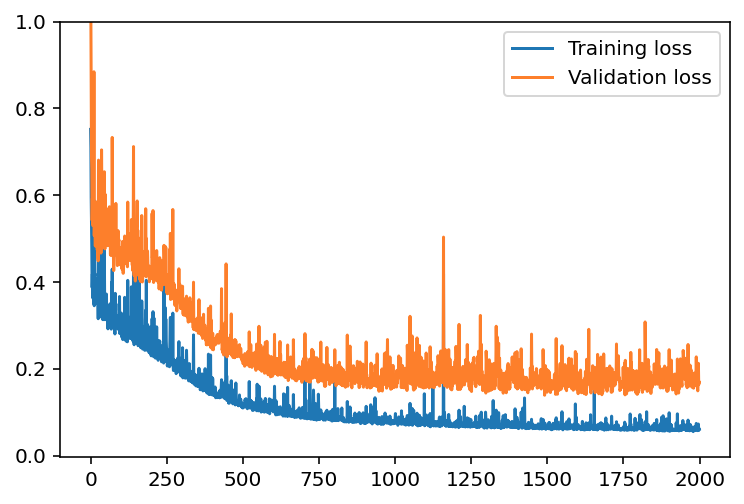

In [14]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss', color='#fd7f2b')
plt.legend()
plt.ylim(ymax=1.0)

### Check out predictions

Using the test data to view how well the network is modelling the data.

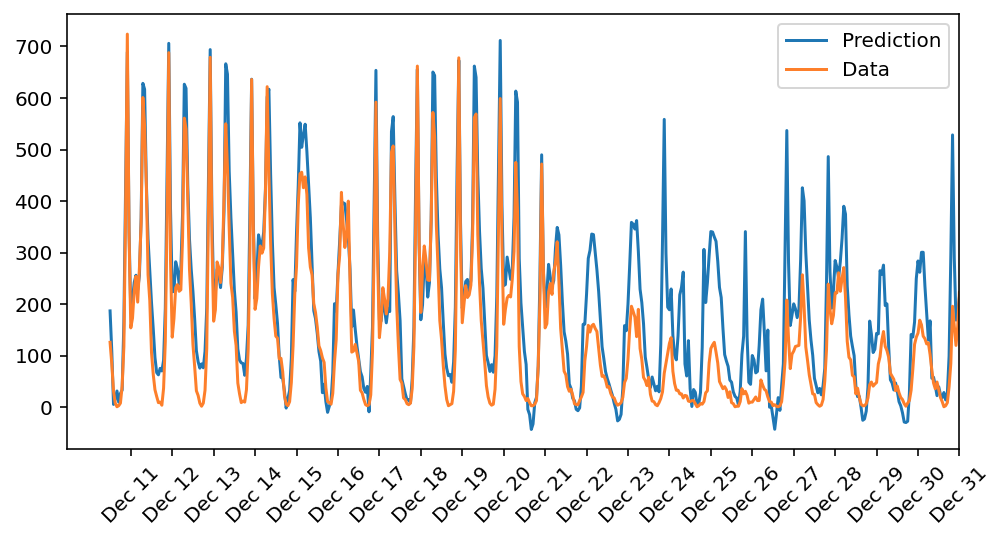

In [15]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data', color='#fd7f2b')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(data.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [16]:
print('mean: {0:.3f}'.format(mean))
print('std: {0:.3f}'.format(std))
print('MSE (validation loss): {0:.3f}'.format(val_loss))
RMSE_val_loss = val_loss**0.5
print('RMSE: {0:.3f}'.format(RMSE_val_loss))
RMSE_rentals = std * RMSE_val_loss
print('RMSE in bike rentals per hour: {0:.1f}'.format(RMSE_rentals))

mean: 189.463
std: 181.388
MSE (validation loss): 0.169
RMSE: 0.411
RMSE in bike rentals per hour: 74.6
